# Exercise 11-1: Create a multiple regression

## Import the data

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
fish = pd.read_csv('Fish.csv')

In [7]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Clean the data

In [16]:
# read the info.txt file and rename the Length columns so they're more descriptive
fish_1 = pd.read_csv('info.txt')
fish_1.head()

,Species: Species name of the fish
0,Weight: Weight of fish in grams
1,Length1: Vertical length in centimeters
2,Length2: Diagonal length in centimeters
3,Length3: Cross length in centimeters
4,Height: Height in centimeters


In [18]:
fish.rename(columns={'Length1' : 'Vertical_length', 'Length2' : 'Diagonal_length', 'Length3' : 'Cross_length'}, inplace=True)
fish.head()

,Species,Weight,Vertical_length,Diagonal_length,Cross_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Identify a correlation

In [19]:
# get the correlation data for the Weight column
fish.corr()[['Weight']]

,Weight
Weight,1.000000
Vertical_length,0.915712
Diagonal_length,0.918618
Cross_length,0.923044
Height,0.724345
Width,0.886507


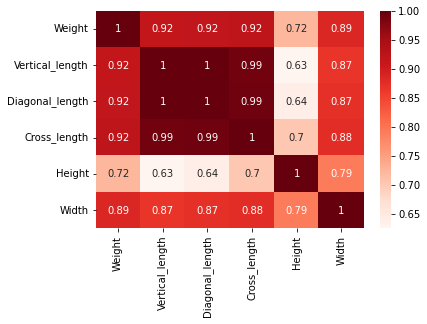

In [20]:
# create a heatmap for the correlation data
sns.heatmap(data = fish.corr(), annot=True, cmap='Reds')

## Create a multiple regression model

In [25]:
# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream
bream = fish.query('Species == "Bream"')
bream.head()

,Species,Weight,Vertical_length,Diagonal_length,Cross_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [28]:
# split the training and test data 
X_train, X_test, y_train, y_test = train_test_split(bream[['Height', 'Width', 'Vertical_length', 'Diagonal_length', 'Cross_length']], bream[['Weight']])

In [29]:
# create the model and fit the training data
train_model = LinearRegression()
train_model.fit(X_train, y_train)

LinearRegression()

In [30]:
# score the testing data
train_model.score(X_test, y_test)

0.8813057200157978

In [37]:
# make the predictions
make_prediction = train_model.predict(X_test)
predict = pd.DataFrame(make_prediction, columns=['Prediction'])
predict.head()

,Prediction
0,616.930847
1,388.447231
2,451.997028
3,536.410360
4,781.798307


In [38]:
# join the predicted data with the original data
predict_sol = predict.join([X_test.reset_index(drop=True), y_test.reset_index(drop=True)])
predict_sol.head()

,Prediction,Height,Width,Vertical_length,Diagonal_length,Cross_length,Weight
0,616.930847,15.4380,5.5800,29.4,32.0,37.2,600.0
1,388.447231,12.7300,4.4555,26.3,29.0,33.5,363.0
2,451.997028,13.6024,4.9274,26.8,29.7,34.7,450.0
3,536.410360,13.9129,5.0728,29.5,32.0,37.3,340.0
4,781.798307,16.8896,6.1984,32.8,36.0,41.6,850.0


## Plot the residuals

In [42]:
# calculate the residuals and store them in a column
predict_sol['Residual'] = predict_sol.Weight - predict_sol.Prediction
predict_sol.head()

,Prediction,Height,Width,Vertical_length,Diagonal_length,Cross_length,Weight,Residual
0,616.930847,15.4380,5.5800,29.4,32.0,37.2,600.0,-16.930847
1,388.447231,12.7300,4.4555,26.3,29.0,33.5,363.0,-25.447231
2,451.997028,13.6024,4.9274,26.8,29.7,34.7,450.0,-1.997028
3,536.410360,13.9129,5.0728,29.5,32.0,37.3,340.0,-196.410360
4,781.798307,16.8896,6.1984,32.8,36.0,41.6,850.0,68.201693


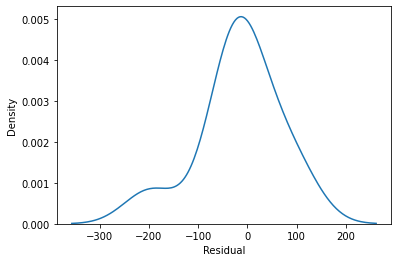

In [43]:
# create a KDE plot for the residuals
sns.kdeplot(x='Residual', data=predict_sol)